In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from sklearn.datasets import fetch_openml

minist=fetch_openml('mnist_784',as_frame=False)

In [4]:
print(minist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
minist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
x,y=minist.data,minist.target

In [7]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

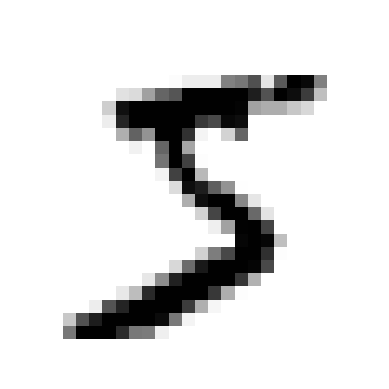

In [105]:
def plot_image(image):
    image =image.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')
    
some_digit=x[0]
plot_image(some_digit)

    

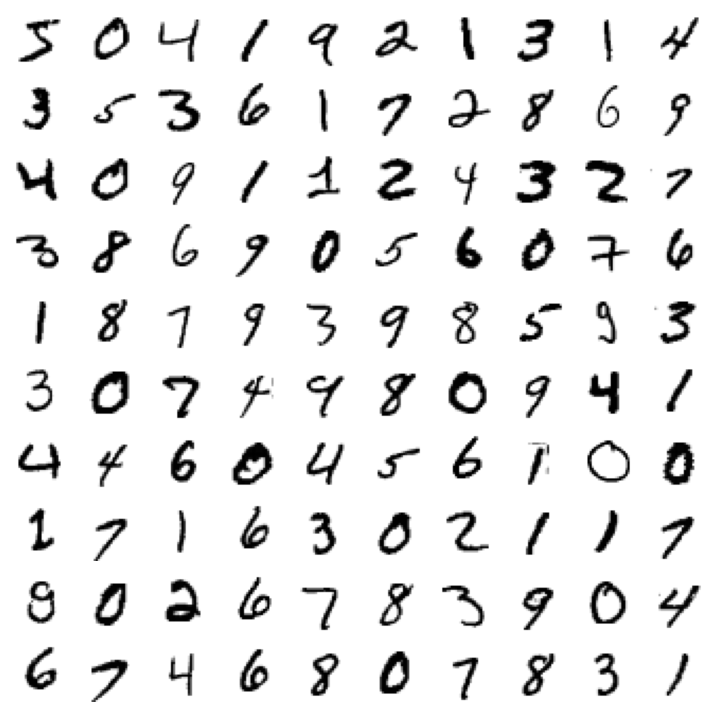

In [10]:
plt.figure(figsize=(9,9))

for idx,image_data in enumerate(x[:100]):
    plt.subplot(10,10,idx+1)
    plot_image(image_data)

In [11]:
unique,counts=np.unique(y[:60000],return_counts=True)
counts

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [12]:
print(unique)
counts/60000

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751667, 0.09915   ])

In [13]:
unique,counts=np.unique(y[60000:],return_counts=True)
counts

array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
      dtype=int64)

In [14]:
print(unique)
counts/10000

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


array([0.098 , 0.1135, 0.1032, 0.101 , 0.0982, 0.0892, 0.0958, 0.1028,
       0.0974, 0.1009])

In [15]:
#similar proportion shuffle correctly

A BINARY CLASSIFIER

In [16]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [17]:
y_train_5=(y_train =='5')
y_test_5=(y_test=='5')

In [18]:
len(y_train_5)

60000

In [19]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

sgd_clf.predict([some_digit])

array([ True])

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [22]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [23]:
from sklearn.dummy import DummyClassifier


dummy_clf=DummyClassifier()
dummy_clf.fit(x_train,y_train_5)
dummy_clf.predict([x_train[0]])

array([False])

In [24]:
cross_val_score(dummy_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

IMPLEMENTING CROSS-VAL FROM SCRATCH

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3)

for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf=clone(sgd_clf)
    x_train_folds=x_train[train_index]
    x_test_fold=x_train[test_index]
    y_train_folds=y_train_5[train_index]
    y_test_fold=y_train_5[test_index]
    
    
    clone_clf.fit(x_train_folds,y_train_folds)
    predictions=clone_clf.predict(x_test_fold)
    n_correct=sum(predictions==y_test_fold)
    print(n_correct/len(predictions))
    

0.95035
0.96035
0.9604


In [26]:
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_predict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score

precision_score(y_train_5,y_predict)

0.8370879772350012

In [29]:
from sklearn.metrics import recall_score
recall_score(y_train_5,y_predict)

0.6511713705958311

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_predict)

0.7325171197343847

PRECISION RECALL TRADE-OFF

In [31]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [32]:
threshold=0
y_some_digit_pred=(y_score>threshold)
y_some_digit_pred

array([ True])

In [33]:
threshold = 3000
y_some_digit_pred=(y_score>threshold)
y_some_digit_pred

array([False])

In [34]:
y_score = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method='decision_function')

In [35]:
y_score

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [36]:
y_score.min()

-146348.56726173862

In [37]:
y_score.max()

49441.437659047755

In [38]:
len(y_score)

60000

In [39]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_score)

In [40]:
print(precisions,'\n',recalls,'\n',thresholds)

[0.09035    0.09035151 0.09035301 ... 1.         1.         1.        ] 
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00] 
 [-146348.56726174 -142300.00705404 -137588.97581744 ...   38871.26391927
   42216.05562787   49441.43765905]


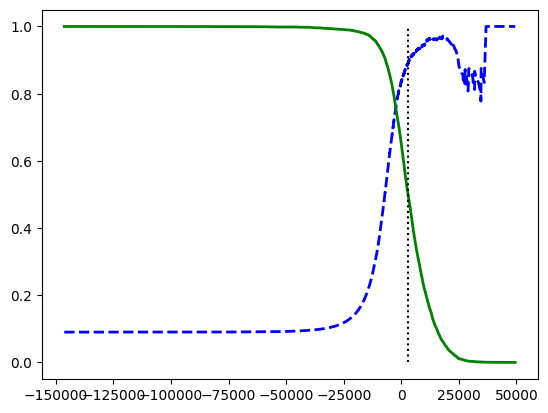

In [41]:
plt.plot(thresholds,precisions[:-1],'b--',label='precision',linewidth=2)
plt.plot(thresholds,recalls[:-1],'g-',label='recall',linewidth=2)
plt.vlines(threshold,0,1.0,'k','dotted',label='threshold')

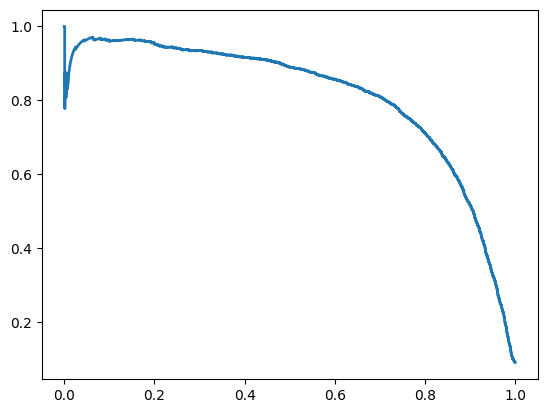

In [42]:
plt.plot(recalls,precisions,linewidth=2,label='precision/recall')

In [43]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [44]:
idx_precision_90=(precisions>=.90).argmax()
threshold_90=thresholds[idx_precision_90]
threshold_90


3370.0194991439557

In [45]:
y_train_pred_5_90=(y_score>=threshold_90)
precision_score(y_train_5,y_train_pred_5_90)

0.9000345901072293

THE ROC CURVE

In [46]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5,y_score)

In [47]:
idx_of_threshold_90=(thresholds <=threshold_90).argmax()
fpr_90,tpr_90=fpr[idx_of_threshold_90],tpr[idx_of_threshold_90]


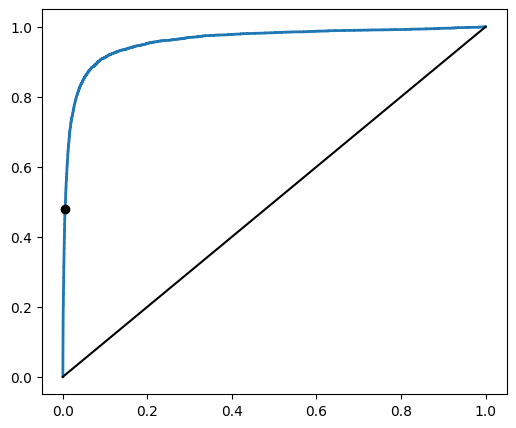

In [48]:
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,linewidth=2,label='ROC CURVE')
plt.plot([0,1],[0,1],'k',label='Random Classifier ROC curve')
plt.plot([fpr_90],[tpr_90],'ko',label='threshold for 90% precision ')

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_score)

0.9604938554008616

MAKING A RANDOM FOREST CLASSIFIER

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)

In [51]:
y_probas_forest = cross_val_predict(forest_clf, x_train,y_train_5,cv=3,method='predict_proba')

In [52]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [53]:
y_train_5

array([ True, False, False, ...,  True, False, False])

50 TO 60 PERCENT CONFIDENCE LEAD TO 90% ACCURECY

In [54]:
idx_50_to_60 = (y_probas_forest[:,1]>.5) & (y_probas_forest[:,1]<.6)
print(y_train_5[idx_50_to_60].sum()/idx_50_to_60.sum())

0.9395604395604396


In [55]:
y_score_forest= y_probas_forest[:,1]
precisions_forest,recalls_forest,thresholds_forest = precision_recall_curve(y_train_5,y_score_forest)

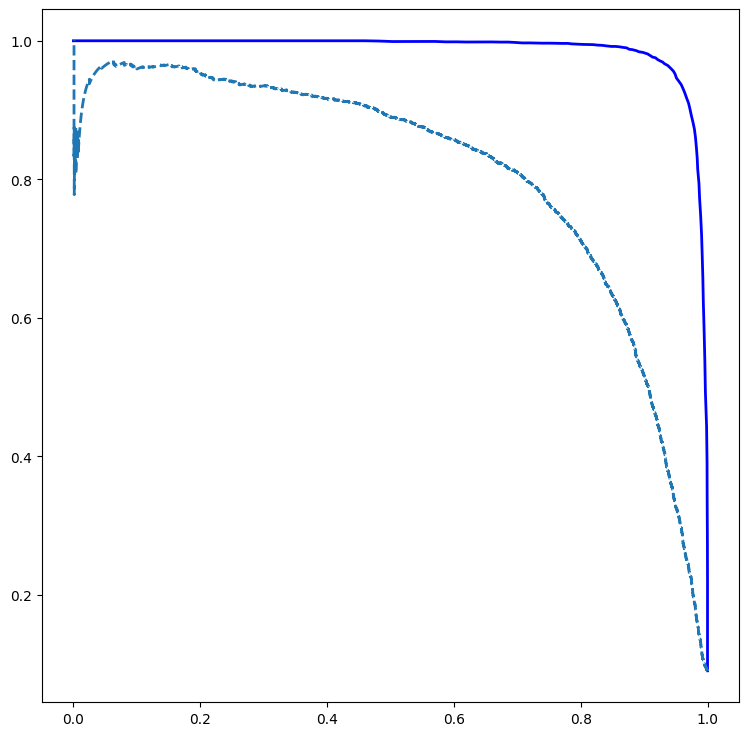

In [56]:
plt.figure(figsize=(9,9))
plt.plot(recalls_forest,precisions_forest,'b-',linewidth=2,label='RandomForest')
plt.plot(recalls,precisions,'--',linewidth=2,label='SGD')

In [57]:
y_train_pred_forest=(y_probas_forest[:,1] >= .5)

f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [58]:
roc_auc_score(y_train_5,y_score_forest)

0.9983436731328145

In [59]:
print(precision_score(y_train_5,y_train_pred_forest),recall_score(y_train_5,y_train_pred_forest))

0.9897468089558485 0.8725327430363402


MULTICLASS CLASSIFICATION

In [60]:
from sklearn.svm import SVC

svc_clf=SVC(random_state=42)
svc_clf.fit(x_train[:2000],y_train[:2000])

SVC(random_state=42)

In [61]:
svc_clf.predict([some_digit])

array(['5'], dtype=object)

In [62]:
some_digit_scores=svc_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [63]:
some_digit_max_value_idx=some_digit_scores.argmax()


In [64]:
svc_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [65]:
svc_clf.classes_[some_digit_max_value_idx]

'5'

In [66]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [67]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [68]:
len(ovr_clf.estimators_)

10

A SIMPLE SDG CLASSIFIER

In [69]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [70]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [71]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype('float64'))

In [72]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

ERROR ANALYSIS

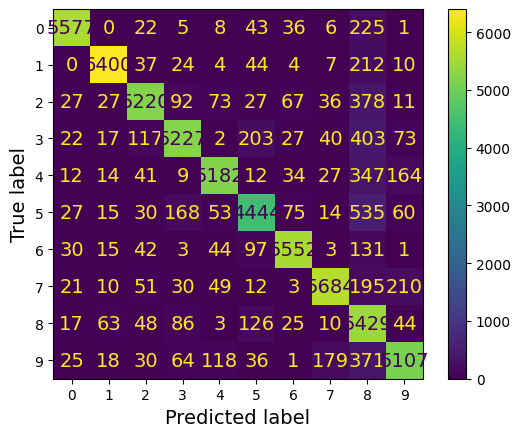

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

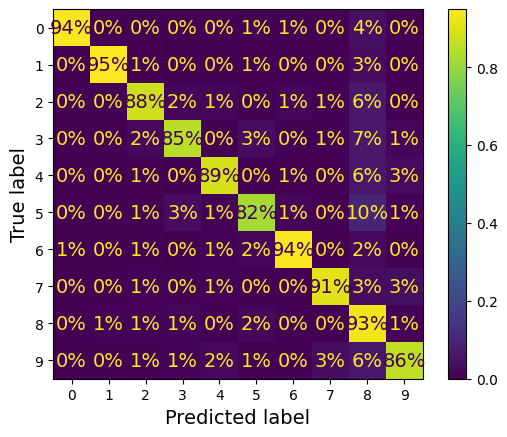

In [74]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format='.0%')
plt.show()

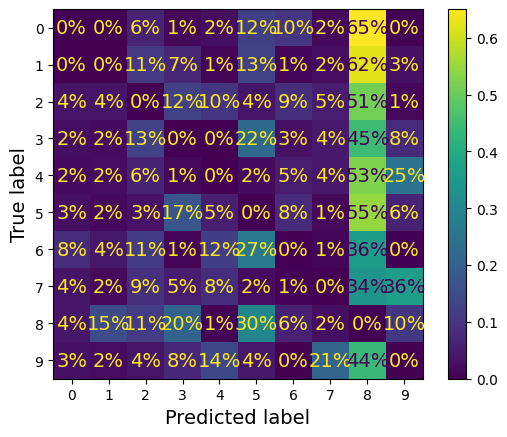

In [75]:
sample_weight=(y_train!=y_train_pred)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize='true',values_format='.0%')
plt.show()

In [79]:
cl_a,cl_b='3','5'
x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]


MULTILABEL CLASSIFICATION

[[array([False, False, False, ..., False, False,  True])],
 [array([ True, False, False, ...,  True, False, False])]]

In [88]:
y_train_large=y_train >='7'
y_train_odd=(y_train.astype('int8')%2==1)
y_train_labels=np.c_[y_train_large,y_train_odd]

In [89]:
y_train_labels

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train_labels)

KNeighborsClassifier()

In [91]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [92]:
y_train_knn_pred=cross_val_predict(knn_clf,x_train,y_train_labels,cv=3)
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [93]:
f1_score(y_train_labels,y_train_knn_pred,average='macro')


0.9764102655606048

In [94]:
from sklearn.multioutput import ClassifierChain
chain_clf=ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(x_train,y_train_labels)

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [96]:
chain_clf.predict([some_digit])

array([[0., 1.]])

Multioutput Classification

In [101]:
np.random.randint(0,100,(len(x_train),784))

array([[ 6, 73,  8, ..., 30, 39, 68],
       [32, 37,  8, ..., 71,  5, 89],
       [67, 81, 77, ..., 79, 87, 35],
       ...,
       [31, 17, 81, ..., 54,  1, 83],
       [61,  5, 89, ..., 31, 27,  9],
       [72,  2, 68, ...,  7, 40, 45]])

In [102]:
np.random.seed(42)
noise=np.random.randint(0,100,((len(x_train),784)))
x_train_mod=x_train+noise
noise=np.random.randint(0,100,((len(x_test),784)))
x_test_mod=x_test+noise
y_train_mod=x_train
y_test_mod=x_test

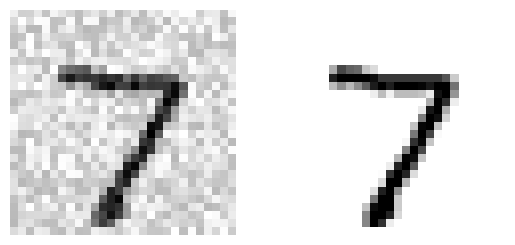

In [108]:
plt.subplot(1,2,1)
plot_image(x_test_mod[0])
plt.subplot(1,2,2)
plot_image(y_test_mod[0])

In [109]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train_mod,y_train_mod)
clean_digit= knn_clf.predict([x_test_mod[0]])


NameError: name 'plot_digit' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

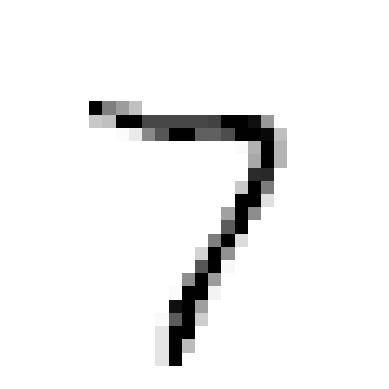

In [111]:
plot_image(clean_digit)
plt.show